In [1]:
#programa utilizado para demonstrar a aplicação dos conceitos de detecção de anomalias em dados de sensores

In [2]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.4 MB/s 


In [3]:
#importando as bibliotecas
import pandas as pd #utilizada para tratar os dataframes
from faker import Faker #biblioteca utilizada para criar nomes falsos que vamos utilizar para simbolizar cada um dos pacientes
import numpy as np #biblioteca utilizada para tratar vetores e matrizes 
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos

In [4]:
#criando o banco de dados para os pacientes em um hospital 
fake = Faker() #criando o objeto para criar os nomes
Faker.seed(4321) #utilizado para garantir que os dados possam ser reproduzidos 

In [5]:
#cria a lista de nomes para os pacientes
lista_pacientes=[]

In [6]:
#cria a lista com nomes de 100 pacientes monitorados
for _ in range(100):
  lista_pacientes.append(fake.name()) #adiciona o nome de cada um dos pacientes

In [7]:
#mostra os 10 primeiros pacientes da lista
print (lista_pacientes[:10])

['Jason Brown', 'Jacob Stein', 'Cody Brown', 'Larry Morales', 'Jessica Hendricks', 'Brian Moore', 'Scott Baker', 'Ruth Hoffman', 'Daniel George', 'David Moody']


In [8]:
#criando os valores para cada um dos pacientes (qtd de visitas e tempo total)
qtd_visitas=[] # lista para gerar a quantidade total de visitas
tempo_total=[] # tempo total gasto com visitas (min) 
np.random.seed(7) #garantindo que os dados possam ser reproduzidos
for _ in range(100):
  visitas = np.random.randint(35,70) #gera os valores para a quantidade de visitas semanais (min de 5 por dia e máximno de 10 por dia)
  minutos_aux=np.random.randint(5,30) #gera os valores aleatorios para o tempo de permanencia
  qtd_visitas.append(visitas)
  tempo_total.append(visitas*5+minutos_aux)


In [9]:
#criando o dataframe com todos os dados
df_pacientes = pd.DataFrame(
{'Paciente': lista_pacientes,
'Qtd Visitas': qtd_visitas,
 'Tempo Total':tempo_total
})

In [10]:
#print do dataframe
df_pacientes.head(5)

,Paciente,Qtd Visitas,Tempo Total
0,Jason Brown,39,222
1,Jacob Stein,38,214
2,Cody Brown,58,302
3,Larry Morales,63,334
4,Jessica Hendricks,58,303


In [11]:
#adicionando a media de tempo de visita para cada paciente
df_pacientes["Tempo Medio"]=df_pacientes["Tempo Total"]/df_pacientes["Qtd Visitas"]

In [12]:
#print do dataframe
df_pacientes.head(5)

,Paciente,Qtd Visitas,Tempo Total,Tempo Medio
0,Jason Brown,39,222,5.692308
1,Jacob Stein,38,214,5.631579
2,Cody Brown,58,302,5.206897
3,Larry Morales,63,334,5.301587
4,Jessica Hendricks,58,303,5.224138


In [13]:
#adicionando valores "errados" para as vistas
print(df_pacientes.loc[22])  #escolhe o paciente 18 para modificar os dados
print(df_pacientes.loc[65]) # escolhe o paciente 65 para modificar os dados

Paciente       Rebecca Castro
Qtd Visitas                63
Tempo Total               327
Tempo Medio          5.190476
Name: 22, dtype: object
Paciente       Joyce Bishop
Qtd Visitas              46
Tempo Total             241
Tempo Medio         5.23913
Name: 65, dtype: object


In [14]:
#modificando os valores 
df_pacientes.at[22, 'Qtd Visitas'] = 11
df_pacientes.at[65, 'Qtd Visitas'] = 8


**Utilizar Análise Estatística**

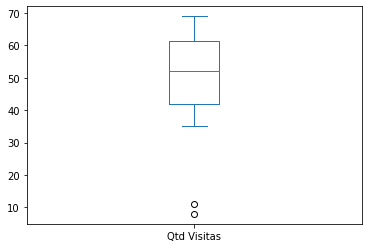

In [15]:
#utilizando o bloxplot 
df_pacientes["Qtd Visitas"].plot(kind='box')

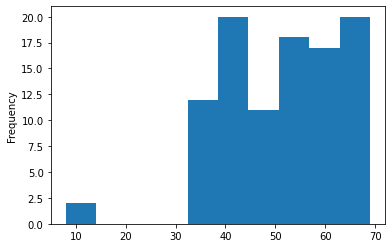

In [16]:
#utilizando o histograma
df_pacientes["Qtd Visitas"].plot(kind='hist')

In [17]:
# Quantidade maxima e mínima de visitas a cada paciente
print('Quantidade mínima de visitas: ' + str(df_pacientes['Qtd Visitas'].min()))
print('Quantidade máxima de visitas: ' + str(df_pacientes['Qtd Visitas'].max()))

Quantidade mínima de visitas: 8
Quantidade máxima de visitas: 69


**Utilizar Machine Learning**

In [18]:
#utilizando o K-means
qtd_visitas_raw = df_pacientes['Qtd Visitas'].values  #convertendo a coluna de Quantidade de Visitas em uma array
print(type(qtd_visitas_raw)) #identifica o tipo de dados da variável

# realizando o reshape para que os dados possam ser utilizados no scipy
qtd_visitas_raw = qtd_visitas_raw.reshape(-1, 1)
qtd_visitas_raw = qtd_visitas_raw.astype('float64')

<class 'numpy.ndarray'>


In [19]:
qtd_visitas_raw[:10]

array([[39.],
       [38.],
       [58.],
       [63.],
       [58.],
       [60.],
       [61.],
       [39.],
       [42.],
       [35.]])

In [20]:
# Criando o algoritmo k-means
from scipy.cluster.vq import kmeans  #biblioteca que contém o k-means
import scipy
    
# Especificando os dados de entrada e a quantidade de cluster que o algoritmo deve utilizam
centroids, avg_distance = kmeans(qtd_visitas_raw, 4) #cria o objeto k-means com o construtor desejado

In [21]:
#obtém cada um dos grupos de dados para o centróide 
groups, cdist = scipy.cluster.vq.vq(qtd_visitas_raw, centroids)

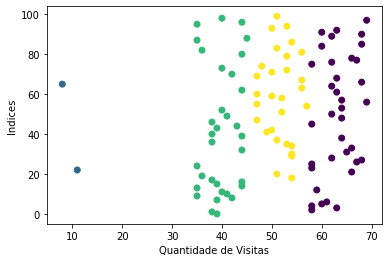

In [22]:
#realiza o print dos dados
plt.scatter(qtd_visitas_raw, np.arange(0,100), c=groups)
plt.xlabel('Quantidade de Visitas')
plt.ylabel('Indices')
plt.show()